# Data Cleaning

## Project Description
Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete data within a dataset. Clean data is essential for accurate analysis and reliable outcomes. This project demonstrates practical data cleaning techniques using real-world datasets.


## Key Concepts Covered
- Data Integrity
- Missing Data Handling
- Duplicate Removal
- Data Standardization
- Outlier Detection and Treatment


## Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset 1: Data Collection
The Airbnb NYC 2019 dataset contains information about listings, prices, locations, room types, and availability.


In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Dataset Overview
Understanding the structure and basic information of the dataset.


In [3]:
df.shape


(48895, 16)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Data Integrity Check
Checking for missing values and inconsistencies in the dataset.


In [6]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Handling Missing Values
Appropriate strategies are applied to handle missing values.


In [8]:
# Fill missing reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


# Drop rows with missing name or host_name
df.dropna(subset=['name', 'host_name'], inplace=True)


## Duplicate Removal
Removing duplicate records to maintain data uniqueness.


In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)


## Data Standardization
Standardizing text columns for consistency.


In [11]:
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower()
df['room_type'] = df['room_type'].str.lower()


## Outlier Detection
Identifying outliers in the price column.


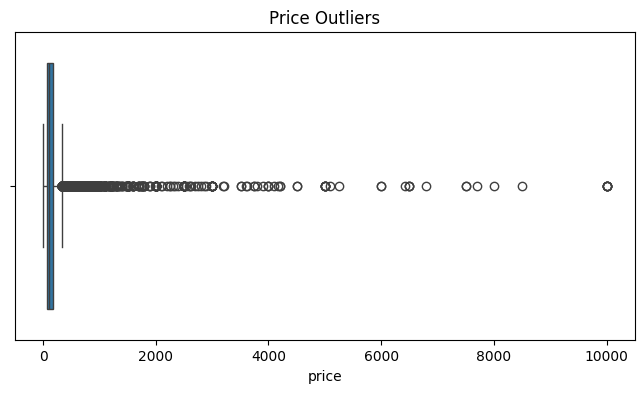

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()


## Outlier Treatment
Capping extreme values to reduce skewness.


In [13]:
upper_limit = df['price'].quantile(0.99)
df = df[df['price'] <= upper_limit]


## Final Dataset Check
Verifying dataset after cleaning.


In [14]:
df.shape


(48384, 16)

In [15]:
df.isnull().sum()


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9813
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

## Saving the Cleaned Dataset
The cleaned dataset is saved for further analysis.


In [16]:
df.to_csv("AB_NYC_2019_cleaned.csv", index=False)


## Dataset 2: JSON Data Collection
This dataset contains category information stored in JSON format.


In [17]:
json_df = pd.read_json("CA_category_id.json")
json_df.head()


,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


## Flattening Nested JSON Data
The JSON data contains nested structures and must be normalized.


In [18]:
cat_df = pd.json_normalize(json_df['items'])
cat_df = cat_df[['id', 'snippet.title']]
cat_df.head()


,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


## Cleaning JSON Data
Removing duplicates and standardizing text.


In [19]:
cat_df.drop_duplicates(inplace=True)
cat_df['snippet.title'] = cat_df['snippet.title'].str.lower()


## Saving Cleaned JSON Data


In [20]:
cat_df.to_csv("CA_category_cleaned.csv", index=False)


## Conclusion
This project demonstrated essential data cleaning techniques including handling missing values, removing duplicates, standardizing formats, and treating outliers. Proper data cleaning ensures data integrity and reliable analysis results.
